In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
df=pd.read_csv('/content/drive/MyDrive/Time_series_analysis_and_forecast_DATASET.csv')
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [53]:
df['FullDate']=pd.to_datetime(df['FullDate'])
df = df.rename(columns={ "FullDate" : "ds" , "ElecPrice" : "y" })
df.set_index('ds',inplace=True)
df.head()

,Tmax,SysLoad,GasPrice,y
ds,,,,
2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [54]:
df.isnull().sum()

Tmax        0
SysLoad     0
GasPrice    0
y           0
dtype: int64

In [55]:
df_daily=df.resample('D').sum()
df_daily.head()

,Tmax,SysLoad,GasPrice,y
ds,,,,
2010-09-01,379.2,41565.380,88.56,2751.700
2010-09-02,369.6,38898.990,88.56,570.810
2010-09-03,439.2,41665.760,106.80,504.975
2010-09-04,328.8,35638.085,81.36,502.275
2010-09-05,357.6,35611.410,106.80,500.555


In [56]:
train_set = df_daily.iloc[:2757, :]
test_set = df_daily.iloc[2757:, :]

Text(0, 0.5, 'price')

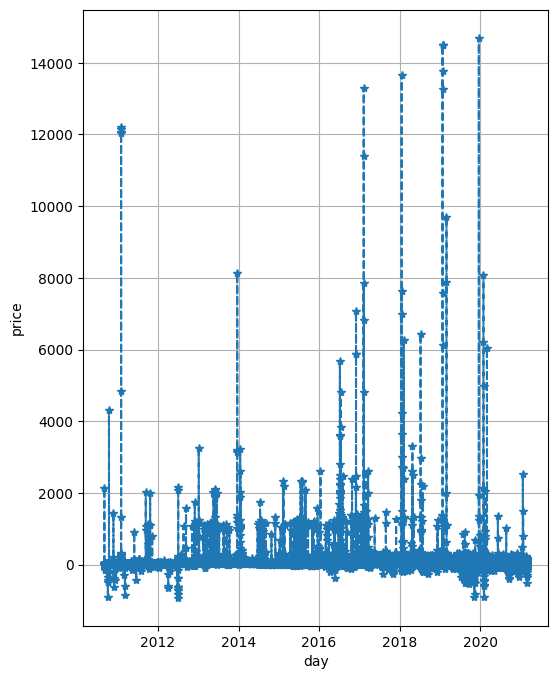

In [57]:

plt.figure(figsize=(6,8))
plt.plot(df.index,df.y,'--',marker='*')
plt.grid()
plt.xlabel('day')
plt.ylabel('price')

In [58]:
from statsmodels.tsa.stattools import adfuller
adf_result=adfuller(df[ 'y' ])
print( f'ADF Statistic: {adf_result[ 0 ]} ' )
print( f'p-value: {adf_result[ 1 ]} ' )
print( f'No. of lags used: {adf_result[ 2 ]} ' )
print( f'No. of observations used : {adf_result[ 3 ]} ' )
print( 'Critical Values:' )
for k, v in adf_result[ 4 ].items():
 print( f' {k} : {v} ' )

ADF Statistic: -31.952975699557843 
p-value: 0.0 
No. of lags used: 53 
No. of observations used : 91962 
Critical Values:
 1% : -3.430421110703783 
 5% : -2.8615714297867108 
 10% : -2.56678672898094 


In [59]:
from prophet import Prophet

In [63]:
test_set['y_org']=test_set['y']
test_set['y']=np.log(test_set['y'])

In [64]:
test_set.head()

,Tmax,SysLoad,GasPrice,y,y_org
ds,,,,,
2018-03-20,540.0,7696.91130,201.5880,2.016729,7.513709
2018-03-21,571.2,4658.05865,203.2560,2.009041,7.456160
2018-03-22,722.4,19161.78525,203.2560,2.044250,7.723363
2018-03-23,811.2,18090.43435,198.6456,2.037053,7.667982
2018-03-24,832.8,3763.53865,180.2160,2.008357,7.451067


In [67]:
test_set=test_set.reset_index()

In [68]:
model = Prophet()
model.fit(test_set)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpefyl_b5i/3vei1kw4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpefyl_b5i/vet6rd1n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5143', 'data', 'file=/tmp/tmpefyl_b5i/3vei1kw4.json', 'init=/tmp/tmpefyl_b5i/vet6rd1n.json', 'output', 'file=/tmp/tmpefyl_b5i/prophet_modelj6787jcq/prophet_model-20230801221744.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:17:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:17:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [69]:
future = model.make_future_dataframe(periods= 10 , freq= 'M' )
forecast = model

In [70]:
forecast = model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,2.038054,1.912860,2.130224,2.038054,2.038054,-0.012613,-0.012613,-0.012613,0.005928,0.005928,0.005928,-0.018541,-0.018541,-0.018541,0.0,0.0,0.0,2.025441
1,2018-03-21,2.038018,1.928521,2.139546,2.038018,2.038018,-0.005897,-0.005897,-0.005897,0.013784,0.013784,0.013784,-0.019682,-0.019682,-0.019682,0.0,0.0,0.0,2.032120
2,2018-03-22,2.037981,1.920237,2.129467,2.037981,2.037981,-0.014512,-0.014512,-0.014512,0.005976,0.005976,0.005976,-0.020487,-0.020487,-0.020487,0.0,0.0,0.0,2.023469
3,2018-03-23,2.037944,1.936596,2.135641,2.037944,2.037944,-0.007992,-0.007992,-0.007992,0.012956,0.012956,0.012956,-0.020948,-0.020948,-0.020948,0.0,0.0,0.0,2.029952
4,2018-03-24,2.037908,1.889133,2.099754,2.037908,2.037908,-0.044446,-0.044446,-0.044446,-0.023383,-0.023383,-0.023383,-0.021064,-0.021064,-0.021064,0.0,0.0,0.0,1.993461


In [75]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(forecast,future)

TypeError: ignored